OBJECTIVE:
- Melakukan Clustering dari tiap data
- Membandingkan hasil analisa EDA dan hasil Clustering

## Import Library

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Load Data

In [225]:
data = pd.read_csv("Life_expectancy_dataset.csv", encoding = 'ISO-8859-1')

In [226]:
data.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [228]:
for i in data.columns:
    print(f"{[i]} \n {data[i].unique()} \n")

['Rank'] 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223] 

['Country'] 
 ['Monaco' 'Japan' 'Singapore' 'Macau; China' 'San Marino' 'Iceland'

In [229]:
data.duplicated().any()

False

In [230]:
data.isna().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

Data ini tidak ada data NaN dan data yang duplikat, juga value yang diluar persebaran

## EDA

In [231]:
data

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


Dari data Life Expectancy ini terlihat bahwa Negara Monaco merupakan negara dengan Overall Life Expectancy terpanjang dibandingkan negara lain

In [232]:
data.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000,223.000000
mean,112.000000,72.487892,70.041704,75.019283
std,64.518731,8.459335,8.074942,8.986633
min,1.000000,50.200000,48.600000,51.000000
25%,56.500000,67.450000,64.500000,69.750000
50%,112.000000,74.900000,72.200000,77.900000
75%,167.500000,78.600000,75.850000,81.600000
max,223.000000,89.500000,85.600000,93.500000


In [233]:
# sns.countplot(x=data['Continent'], hue=data['Overall Life'])

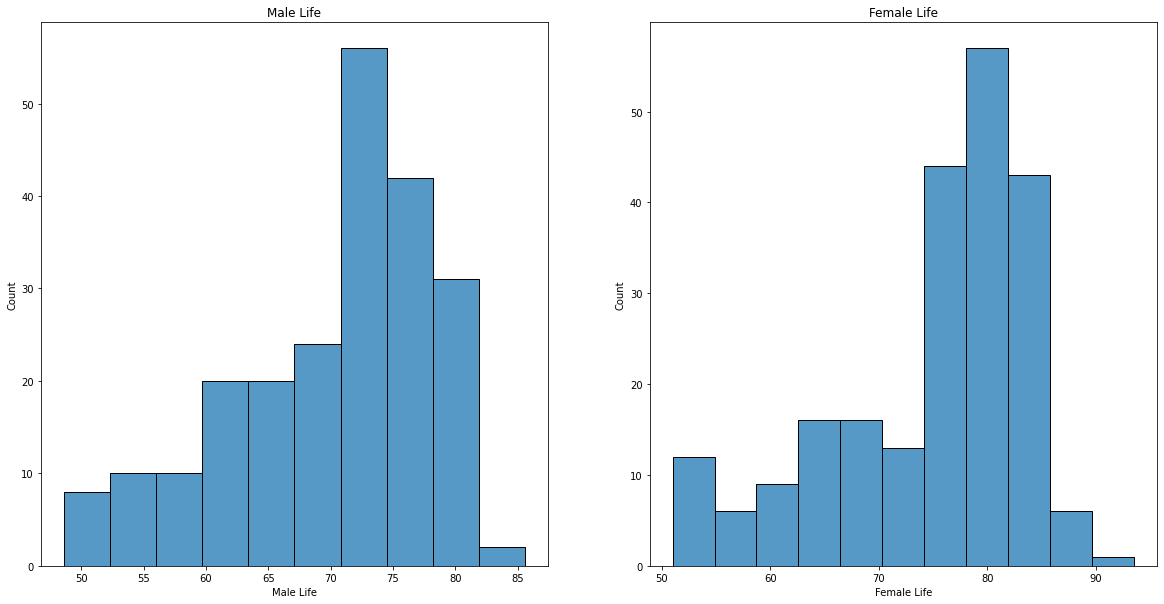

In [234]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.histplot(x=data["Male Life"])
plt.title("Male Life")

plt.subplot(122)
sns.histplot(x=data["Female Life"])
plt.title("Female Life")
plt.show()

Perbandingan Life Expectancy antara pria dan wanita dari 223 negara, rata2 life expectancy yang paling banyak untuk pria berada di sekitar umur 70-80 dan untuk wanita berada di sekitar 75-82 tahun

<AxesSubplot:xlabel='Male Life', ylabel='Density'>

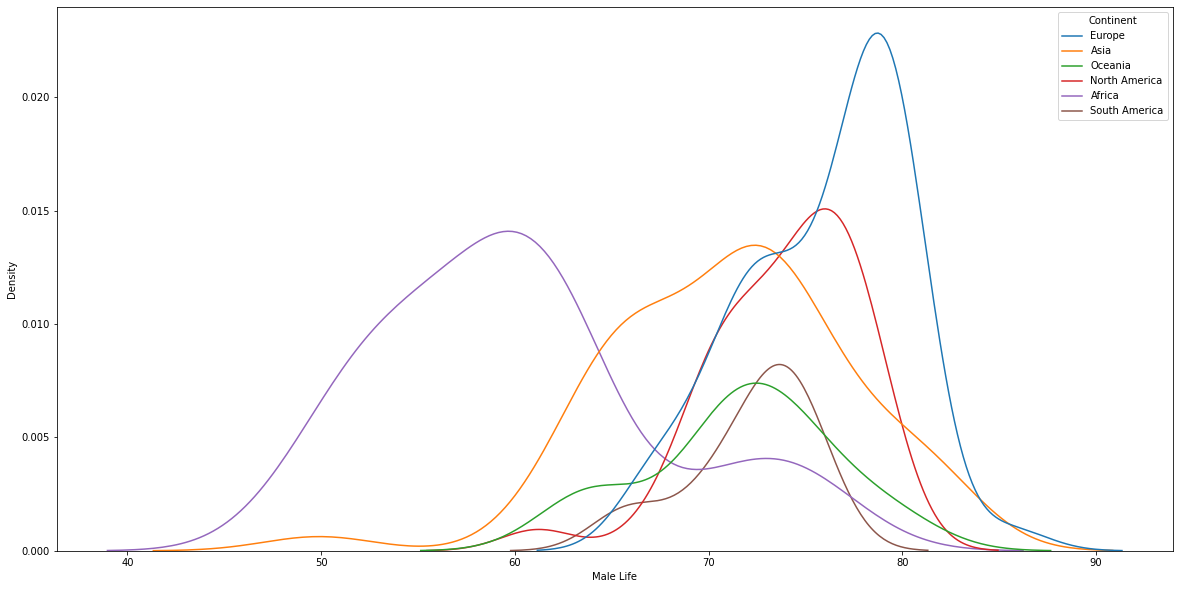

In [235]:
plt.figure(figsize=(20,10))
sns.kdeplot(x=data['Male Life'], hue=data['Continent'])

<AxesSubplot:xlabel='Female Life', ylabel='Density'>

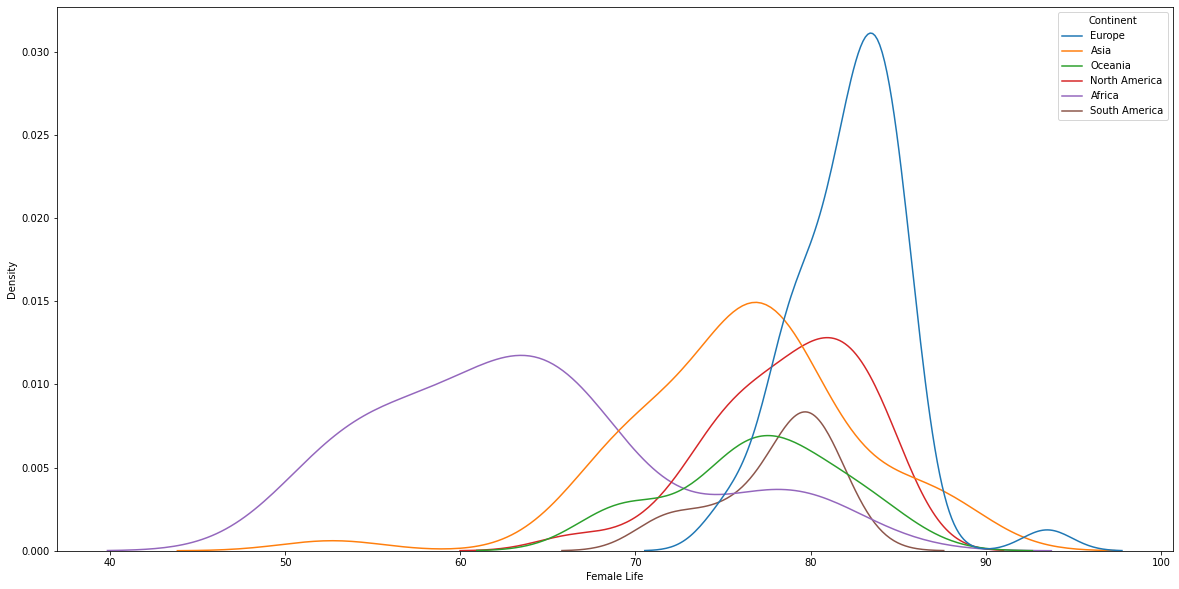

In [236]:
plt.figure(figsize=(20,10))
sns.kdeplot(x=data['Female Life'], hue=data['Continent'])

Dari grafik diatas, Benua Eropa merupakan benua yang memiliki angka harapan hidup di umur 70-90 tahun, rata2 untuk setiap benua berada di angka tersebut, kecuali benua africa yang harapan hidup tertinggi berada di angka 50-65 tahun

<AxesSubplot:xlabel='Overall Life', ylabel='Density'>

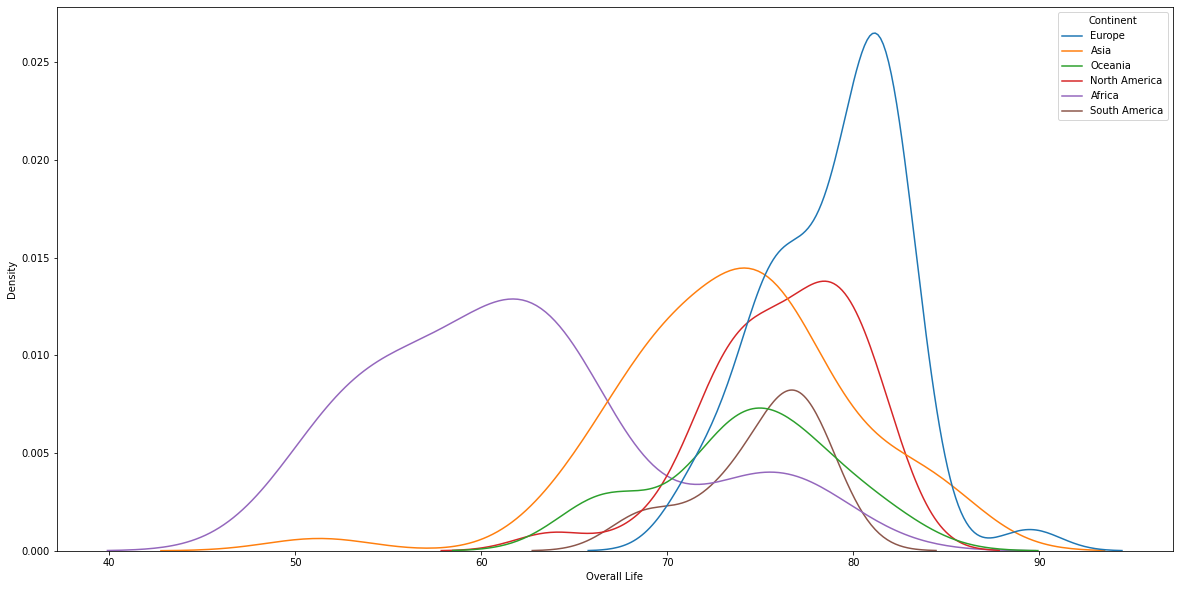

In [237]:
plt.figure(figsize=(20,10))
sns.kdeplot(x=data['Overall Life'], hue=data['Continent'])

<AxesSubplot:xlabel='Continent', ylabel='Overall Life'>

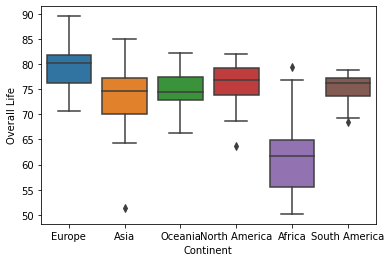

In [238]:
sns.boxplot(x=data["Continent"], y=data["Overall Life"])

Intinya, benua eropa memiliki Life Expectancy yang tertinggi dibandingkan dengan benua lain dengan 70-90 tahun, dan di benua africa merupakan benua dengan life expectancy terendah dengan rentang umur 50-75 tahun, walaupun ada juga yang sampai berumur 80 tahun

### Data Distribution

In [239]:
col = list(data.columns)
col

['Rank', 'Country', 'Overall Life', 'Male Life', 'Female Life', 'Continent']

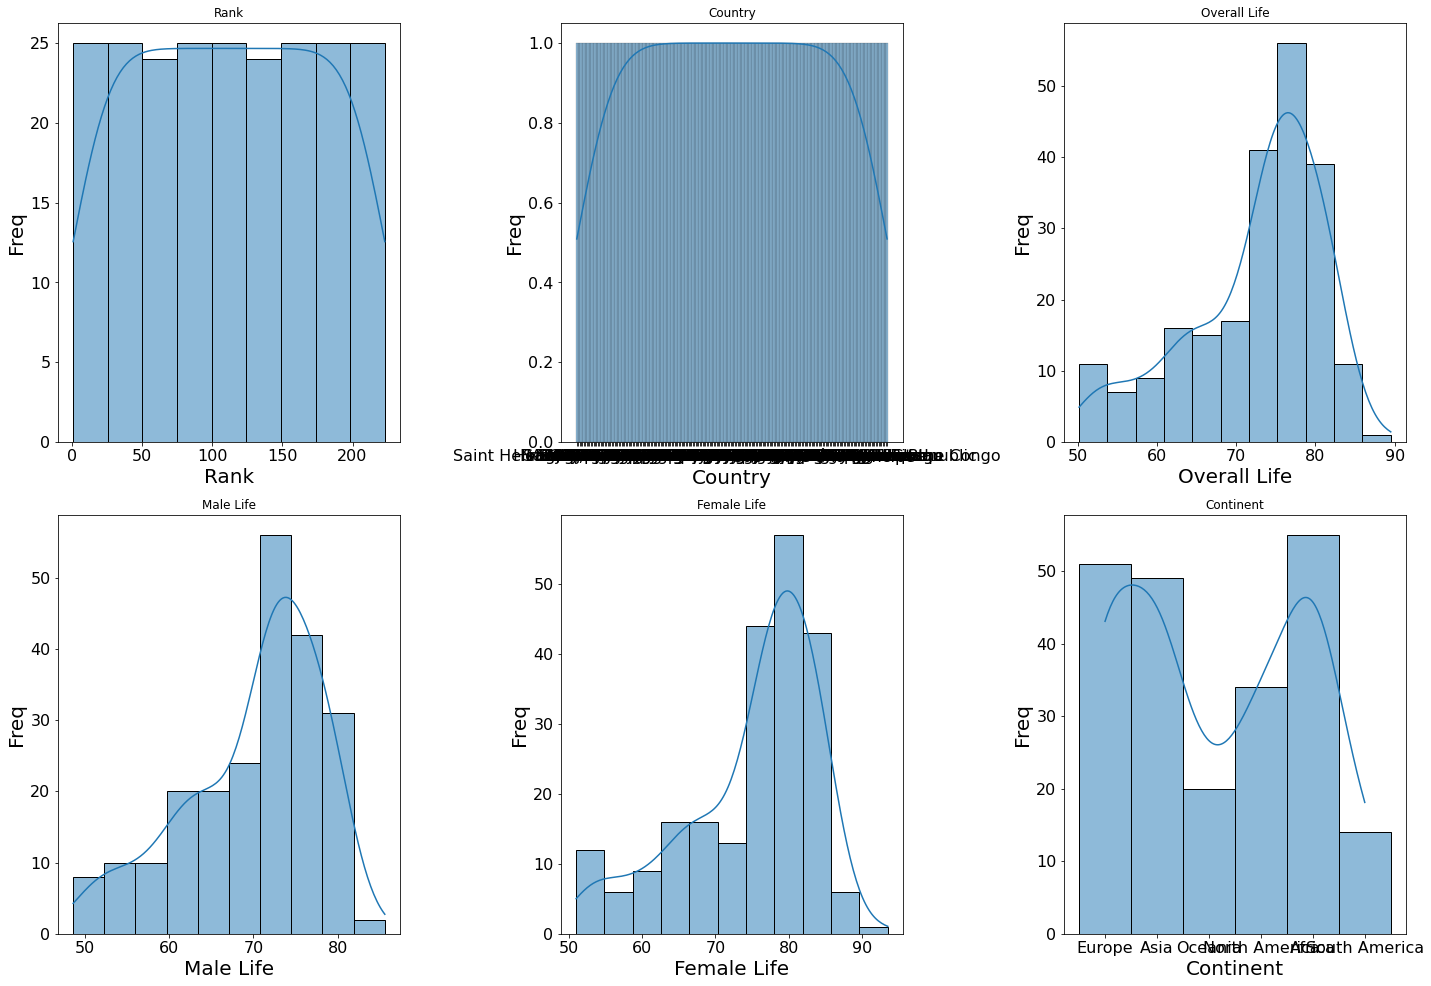

In [240]:
plt.figure(figsize=(20, 20))
for i in range(len(col)):
    plt.subplot(len(col)//2, 3, i+1)
    ax = sns.histplot(
        data[col[i]],
        kde = True
    )
    ax.set_xlabel(str(col[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(col[i]))
plt.tight_layout()
plt.show()

Dari distribusi data, untuk kolom Male Life, Female Life dan Overall Life memiliki data yang terdistribusi cukup normal

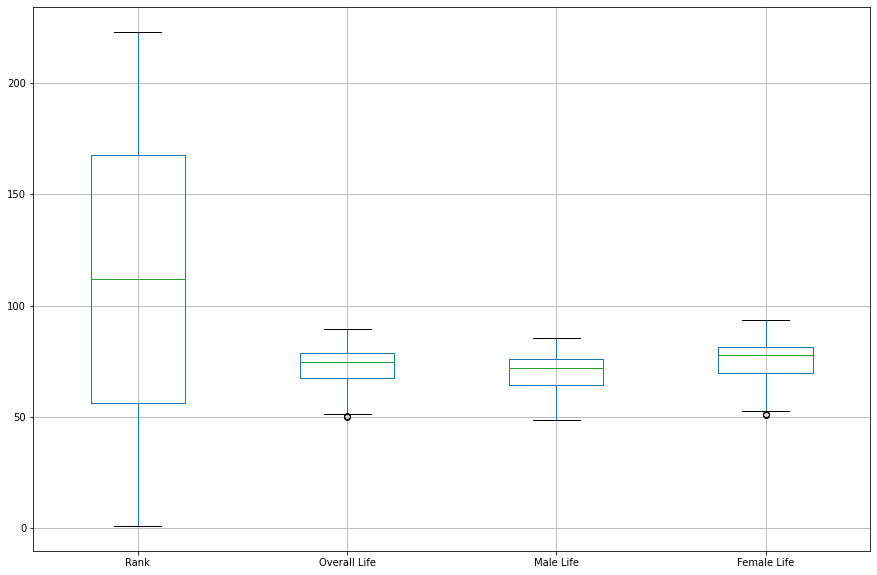

In [241]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.show()

Dari boxplot ini juga terlihat ada outliers tetapi tidak jauh dari distribusi data, sehingga saya tidak akan melakukan handling outliers

## Modeling

In [242]:
data_pros = data[["Overall Life", "Male Life", "Female Life"]]
data_pros

,Overall Life,Male Life,Female Life
0,89.5,85.6,93.5
1,85.0,81.7,88.5
2,85.0,82.3,87.8
3,84.5,81.6,87.6
4,83.3,80.7,86.1
...,...,...,...
218,52.1,51.6,52.5
219,51.6,52.2,51.0
220,51.3,49.9,52.7
221,50.6,48.6,52.7


In [243]:
scaler = StandardScaler()
data_scal = scaler.fit_transform(data_pros)

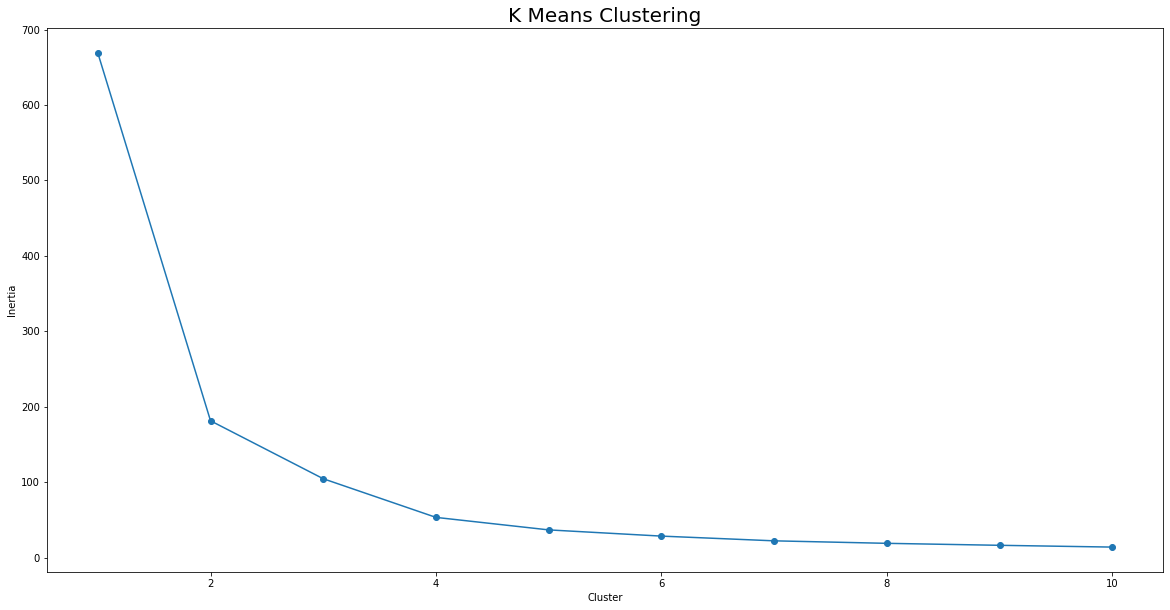

In [244]:
iner = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 15)
    kmeans.fit(data_scal)
    iner.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1, 11), iner, marker ="o")
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

Dari elbow method, sekilas nilai dari 4 cluster merupakan yang paling baik

### Silhouette Score

Text(0, 0.5, 'Silhouette Score')

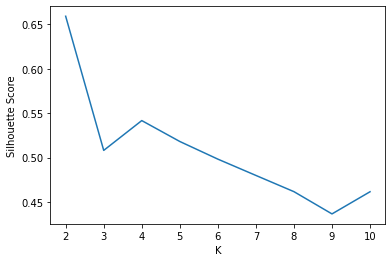

In [245]:
K=[2,3,4,5,6,7,8,9,10]
s_score=[silhouette_score(data_scal, KMeans(n_clusters=i).fit(data_scal).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [246]:
for i in range(2, 10):
    score = silhouette_score(data_scal, KMeans(n_clusters = i).fit_predict(data_scal))
    print(f'Silhouette score for {i} clusters:', '%.3f' % score)

Silhouette score for 2 clusters: 0.659
Silhouette score for 3 clusters: 0.508
Silhouette score for 4 clusters: 0.542
Silhouette score for 5 clusters: 0.518
Silhouette score for 6 clusters: 0.504
Silhouette score for 7 clusters: 0.479
Silhouette score for 8 clusters: 0.453
Silhouette score for 9 clusters: 0.469


Dilihat dari Silhouette Score, nilai K=4 merupakan yang paling bagus dengan score 0.542

In [247]:
kmeans = KMeans(n_clusters=4, random_state=15)
kmeans.fit(data_scal)

KMeans(n_clusters=4, random_state=15)

In [248]:
lab = kmeans.labels_
lab

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [249]:
fin = data.copy()
fin

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [250]:
fin["Cluster"] = lab
fin.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Cluster
0,1,Monaco,89.5,85.6,93.5,Europe,3
1,2,Japan,85.0,81.7,88.5,Asia,3
2,3,Singapore,85.0,82.3,87.8,Asia,3
3,4,Macau; China,84.5,81.6,87.6,Asia,3
4,5,San Marino,83.3,80.7,86.1,Europe,3


In [251]:
fin["Cluster"].unique()

array([3, 0, 1, 2])

In [252]:
fin["Cluster"].value_counts()

0    90
3    68
1    41
2    24
Name: Cluster, dtype: int64

## PCA

Disini saya tidak melakukan PCA untuk model K-Means, karena 3 feature menurut saya sudah cukup untuk model K-Means ini, disini saya melakukan PCA untuk membuat plot pemisahan cluster dari data ini

In [253]:
pca = PCA(n_components=2)
pca2 = pca.fit_transform(data_scal)

In [254]:
pca_data = pd.DataFrame(data=pca2, columns=["C1", "C2"])
pca_data

,C1,C2
0,-3.468599,-0.091908
1,-2.559335,-0.039879
2,-2.557261,0.067979
3,-2.460010,0.022324
4,-2.216841,0.061627
...,...,...
218,4.166172,0.157309
219,4.253993,0.328284
220,4.329837,-0.007666
221,4.470880,-0.121758


In [255]:
pca_data["Clustering"] = lab
pca_data

,C1,C2,Clustering
0,-3.468599,-0.091908,3
1,-2.559335,-0.039879,3
2,-2.557261,0.067979,3
3,-2.460010,0.022324,3
4,-2.216841,0.061627,3
...,...,...,...
218,4.166172,0.157309,2
219,4.253993,0.328284,2
220,4.329837,-0.007666,2
221,4.470880,-0.121758,2


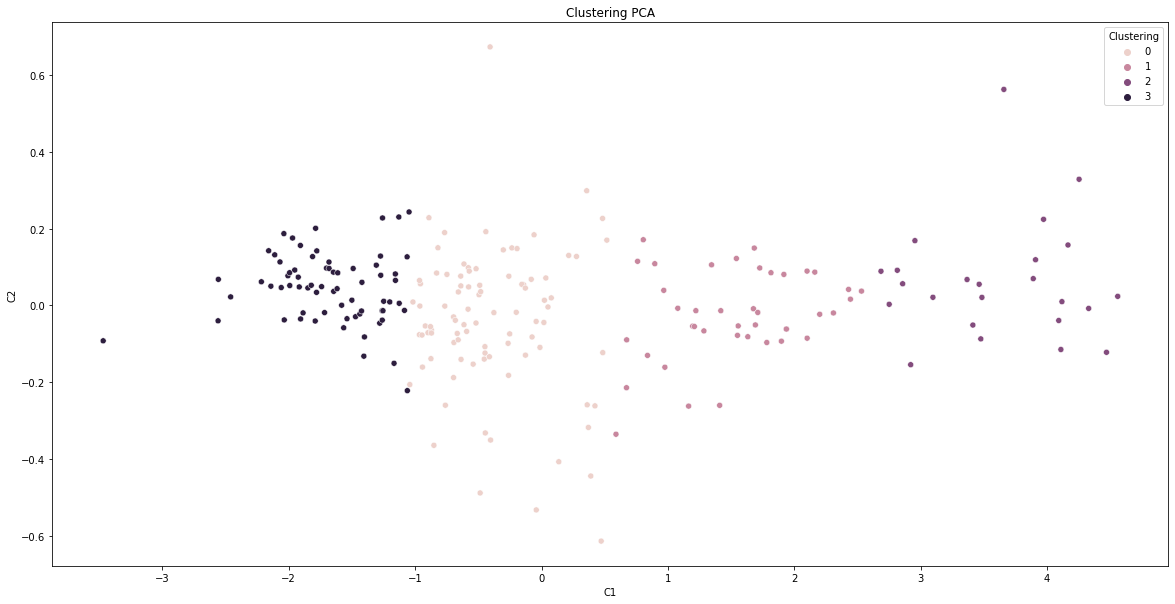

In [256]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='C1', y='C2', hue='Clustering', data=pca_data)
plt.title("Clustering PCA")
plt.show()

Dari plot diata, model K-Means ini sudah dapat memisahkan tiap cluster nya dengan cukup jelas

## Model Inference

In [257]:
data

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [258]:
pred = pd.DataFrame([{
    'Overall Life': 60,
    'Male Life': 75,
    'Female Life': 70,
}], index=[0])
pred

,Overall Life,Male Life,Female Life
0,60,75,70


In [259]:
pred_scd = scaler.transform(pred)


In [260]:
res = kmeans.predict(pred_scd)
print("Data tersebut berada di kluster", res[0])

Data tersebut berada di kluster 1


## Analisa

In [261]:
fin

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Cluster
0,1,Monaco,89.5,85.6,93.5,Europe,3
1,2,Japan,85.0,81.7,88.5,Asia,3
2,3,Singapore,85.0,82.3,87.8,Asia,3
3,4,Macau; China,84.5,81.6,87.6,Asia,3
4,5,San Marino,83.3,80.7,86.1,Europe,3
...,...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa,2
219,220,Swaziland,51.6,52.2,51.0,Africa,2
220,221,Afghanistan,51.3,49.9,52.7,Asia,2
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa,2


In [262]:
fin.drop(columns=['Rank', 'Country'], inplace=True)


In [263]:
fin.head()

,Overall Life,Male Life,Female Life,Continent,Cluster
0,89.5,85.6,93.5,Europe,3
1,85.0,81.7,88.5,Asia,3
2,85.0,82.3,87.8,Asia,3
3,84.5,81.6,87.6,Asia,3
4,83.3,80.7,86.1,Europe,3


<Figure size 720x576 with 0 Axes>

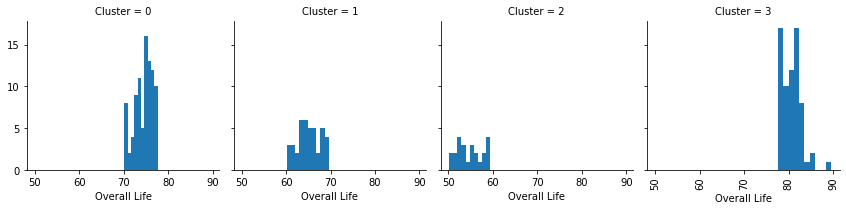

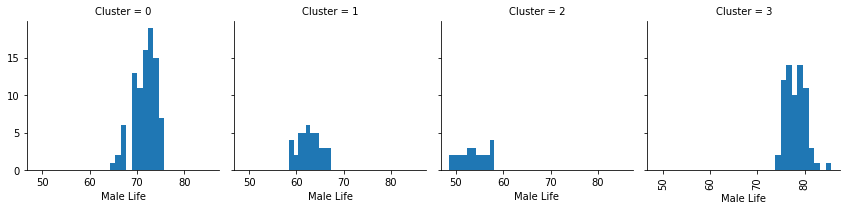

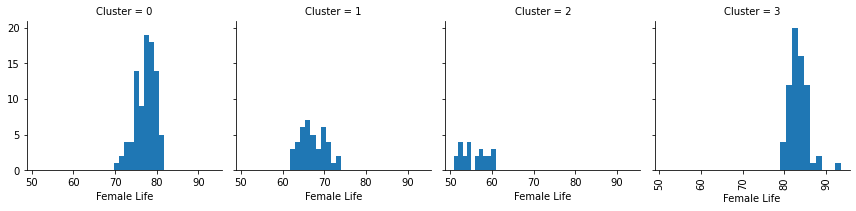

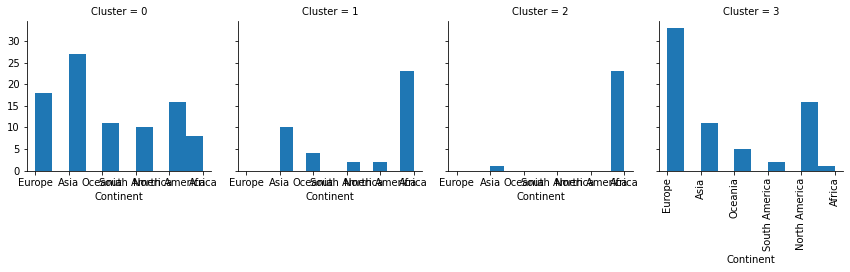

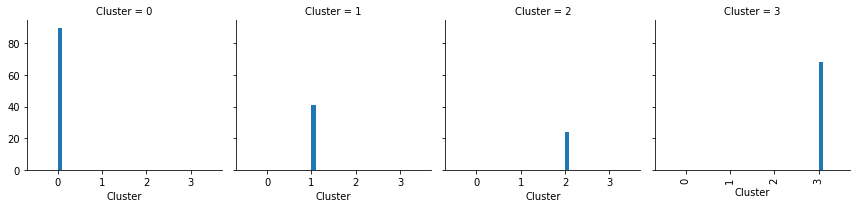

In [264]:
plt.figure(figsize=(10,8))
for i in fin:
    pt = sns.FacetGrid(fin, col='Cluster')
    pt.map(plt.hist, i)
    plt.xticks(rotation=90)
plt.show()

Dari hasil pembagian cluster dengan K-Means ini diapatkan 4 cluster dengan cluster 0,1,2,3,4
- Cluster 0 :
    - Cluster 0 ini merupakan kelompok dengan overall life expectancy berada di umur sekitar 70-79 tahun
    - Life expectancy dari male life ini berada di umur sekitar 65-75 tahun
    - Life expectancy dari female life ini berada di umur sekitar 70-82 tahun
    - data ini mayoritas berada di benua Asia

- Cluster 1 :
    - Cluster 1 ini merupakan kelompok dengan overall life expectancy berada di umur sekitar 60-70 tahun
    - Life expectancy dari male life ini berada di umur sekitar 57-67 tahun
    - Life expectancy dari female life ini berada di umur sekitar 62-74 tahun
    - data ini mayoritas berada di benua Africa

- Cluster 2 :
    - Cluster 2 ini merupakan kelompok dengan overall life expectancy berada di umur sekitar 50-68 tahun
    - Life expectancy dari male life ini berada di umur sekitar 48-58 tahun
    - Life expectancy dari female life ini berada di umur sekitar 52-62 tahun
    - data ini mayoritas berada di benua Africa

- Cluster 3 :
    - Cluster 3 ini merupakan kelompok dengan overall life expectancy berada di umur sekitar 77-89 tahun
    - Life expectancy dari male life ini berada di umur sekitar 75-93 tahun
    - Life expectancy dari female life ini berada di umur sekitar 78-95 tahun
    - data ini mayoritas berada di benua Eropa


Dari pembagian tersebut dapat dilihat bahwa cluster 0 merupakan kelas dengan life expectancy menegah keatas, cluster 1 merupakan kelas dengan life expectancy menengah, cluster 2 merupakan kelas dengan life expectancy rendah, dan cluster 3 merupakan kelas dengan life expectancy yang tinggi.
jika dibandingkan dengan analisa EDA, pembagian kelas ini sudah sesuai, dimana Kelas 3 merupakan cluster dengan life expectancy tinggi berada di eropa, dan kelas 2 merupakan life expectancy rendah berada di benua afrika, dan life expectancy untuk wanita lebih besar dibandingkan dengan life expectancy pria



## Kesimpulan

- Perbandingan Life Expectancy antara pria dan wanita dari 223 negara, Life expectancy wanita lebih besar dibandingkan pria
- Benua Eropa merupakan benua yang memiliki angka harapan hidup di umur 70-90 tahun, rata2 untuk setiap benua berada di angka tersebut, kecuali benua africa yang harapan hidup tertinggi berada di angka 50-65 tahun, terendah dibandingkan benua lain
- Menggunakan Model K-Means untuk membagi Cluster
- Elbow Method dan Silhouette Score menunjukan cluster yang optimal berada di K=4 dan memiliki score paling baik
- plotting menggunakan PCA sudah terlihat jelas pembagian dari masing2 Cluster
- Berdasarkan analisa, Cluster 0 merupakan kelas menengah keatas, cluster 1 kelas menegah, cluster 2 kelas rendah, cluster 3 kelas tinggi
- dibandingkan dengan EDA, hasilnya sudah sesuai, dimana cluster 2 banyak data berasal dari benua afrika, dan cluster 3 data paling banyak dari benua eropa